In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib #많은 양의 데이터를 학습 시킬 때 피클 파일로 저장하는 lib
import streamlit as st # 8501 port 사용
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [66]:
# 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [67]:
# 1. 데이터 로드 및 전처리
data = pd.read_csv('dataset/diabetes.csv')

In [68]:
# 선택된 feature만 사용
selected_features = ['Glucose', 'BMI', 'Age']
X = data[selected_features]
y = data['Outcome']

In [69]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# 2. 랜덤포레스트 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# 예측
y_pred = model.predict(X_test)

In [71]:
# 모델 평가
# R2, MSE, MAE 계산
r2 = r2_score(y_test, y_pred)  # R² (결정계수)
mse = mean_squared_error(y_test, y_pred)  # MSE (평균 제곱 오차)
mae = mean_absolute_error(y_test, y_pred)  # MAE (평균 절대 오차)

# 평가 결과 출력
print(f"R² (결정계수): {r2:.2f}")
print(f"MSE (평균 제곱 오차): {mse:.2f}")
print(f"MAE (평균 절대 오차): {mae:.2f}")

# 정확도 출력 (분류 모델에서 정확도도 확인 가능)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

R² (결정계수): -0.16
MSE (평균 제곱 오차): 0.27
MAE (평균 절대 오차): 0.27
Accuracy: 0.73


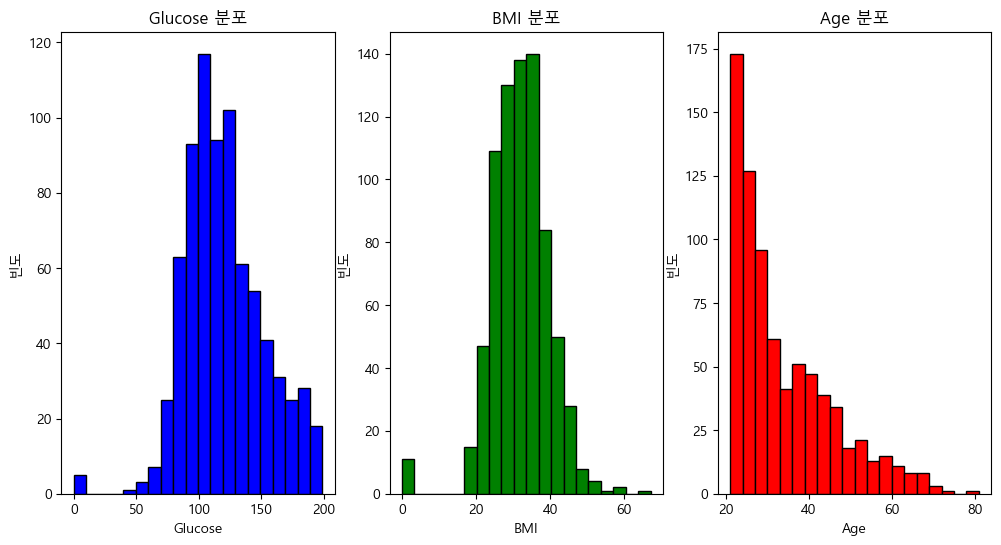

In [72]:
# 데이터의 분포를 히스토그램으로 시각화
plt.figure(figsize=(12, 6))

# Glucose 히스토그램
plt.subplot(1, 3, 1)  # 1행 3열 중 첫 번째 subplot
plt.hist(data['Glucose'], bins=20, color='blue', edgecolor='black')
plt.title('Glucose 분포')
plt.xlabel('Glucose')
plt.ylabel('빈도')

# BMI 히스토그램
plt.subplot(1, 3, 2)  # 1행 3열 중 두 번째 subplot
plt.hist(data['BMI'], bins=20, color='green', edgecolor='black')
plt.title('BMI 분포')
plt.xlabel('BMI')
plt.ylabel('빈도')

# Age 히스토그램
plt.subplot(1, 3, 3)  # 1행 3열 중 세 번째 subplot
plt.hist(data['Age'], bins=20, color='red', edgecolor='black')
plt.title('Age 분포')
plt.xlabel('Age')
plt.ylabel('빈도')
plt.show()

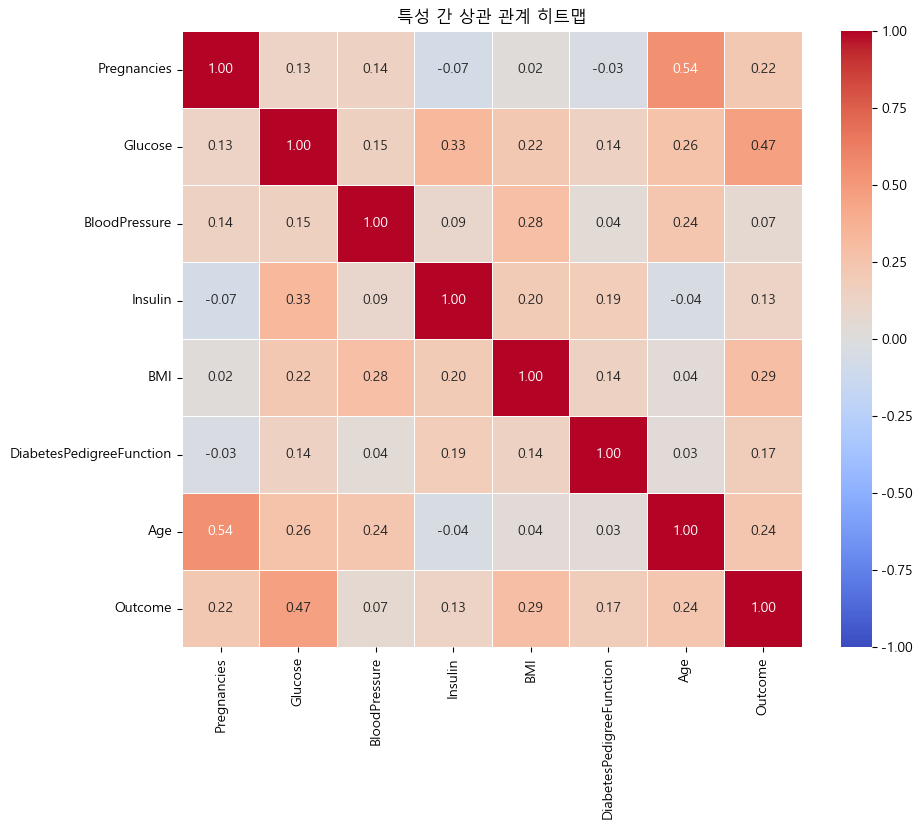

In [73]:
# 데이터의 상관 관계 계산
corr = data.corr()  # 상관 관계 계산

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 히트맵의 크기 설정
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# 제목 설정
plt.title('특성 간 상관 관계 히트맵')

# 그래프 표시
plt.show()

C:\Users\human-13\AppData\Local\Temp\ipykernel_12504\1198561461.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


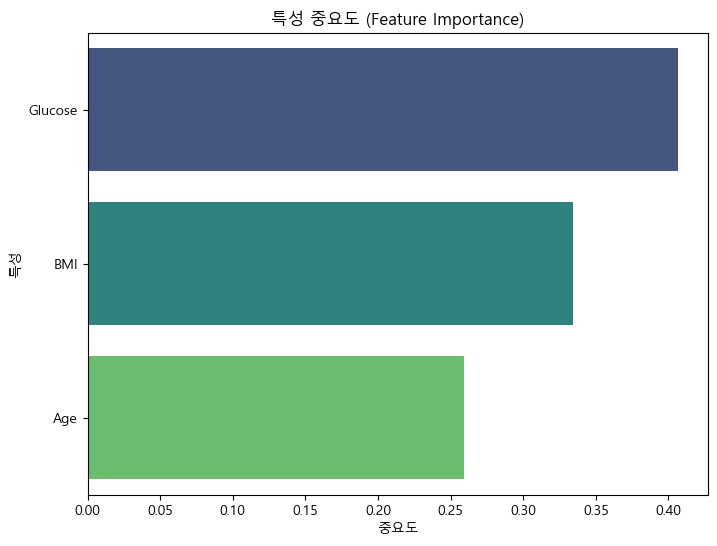

In [74]:
# 특성 중요도 추출
importances = model.feature_importances_

# 중요도에 따른 특성 정렬
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 막대 그래프 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('특성 중요도 (Feature Importance)')
plt.xlabel('중요도')
plt.ylabel('특성')
plt.show()

In [75]:
# 사용자 입력 받기
st.write("### 4. 예측하기")  # 제목 출력
glucose = st.slider('Glucose (혈당 수치)', min_value=0, max_value=200, value=100)  # 혈당 값 입력 받기
bmi = st.slider('BMI (체질량 지수)', min_value=0.0, max_value=50.0, value=25.0, step=0.1)  # BMI 값 입력 받기
age = st.slider('Age (나이)', min_value=0, max_value=100, value=30)  # 나이 값 입력 받기

# 예측하기 버튼
if st.button('예측하기'):  # 예측하기 버튼 클릭 시
    # 저장된 모델 로드
    model = joblib.load('diabetes_model.pkl')  # 모델 불러오기
    input_data = np.array([[glucose, bmi, age]])
    # 예측하기
    prediction = model.predict(input_data)[0]  # 예측 수행

    # 결과 출력
    if prediction == 1:
        st.write('예측 결과: 당뇨병 가능성이 높습니다.')  # 당뇨병 가능성이 높을 경우
    else:
        st.write('예측 결과: 당뇨병 가능성이 낮습니다.')  # 당뇨병 가능성이 낮을 경우

2025-01-07 16:48:16.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:48:16.890 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:48:16.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:48:16.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:48:16.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:48:16.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:48:16.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:48:16.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar